### Visualize and compare a set of experiments
each experiment should be a pickled list of dicts

In [95]:
import dill
import glob
import matplotlib.pyplot as plt

In [96]:
# assume they're all named the same thing
fname = "train_history.dill"
# and have a shared parent dir
parent_dir = "out/test_out/"
glob_str = parent_dir + "**/**/" + fname

In [97]:
files = glob.glob(glob_str, recursive=True)
print(files)

['out/test_out/2/train_history.dill', 'out/test_out/2/1/train_history.dill', 'out/test_out/1/train_history.dill', 'out/test_out/2/train_history.dill', 'out/test_out/2/1/train_history.dill', 'out/test_out/2/1/train_history.dill', 'out/test_out/1/train_history.dill']


In [98]:
all_history = {}
for name in files:
  with open(name, "br") as f:
    history = dill.load(f)
    if len(history) == 0:
      print(f"{name} is empty.")
      continue
    for k in history[0].keys():
      d = all_history.get(k, {})
      id = name.lstrip(dir + "/").rstrip("/" + fname)
      d[id] = [x[k] for x in history]
      all_history[k] = d

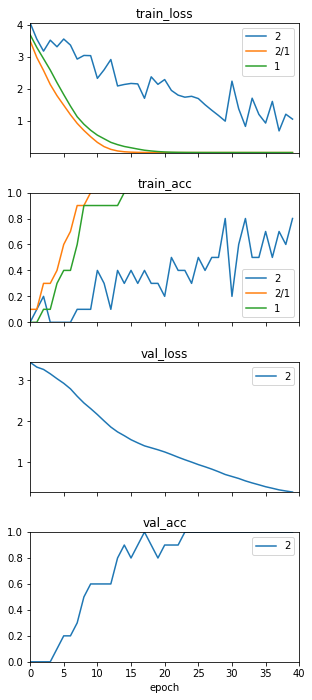

In [100]:
num_keys = len(all_history.keys())
num_runs = len(files)
f, ax = plt.subplots(num_keys, sharex=True, figsize=(5, 10))
f.tight_layout(pad=3.0)
for i, key in enumerate(all_history.keys()):
  runs = all_history[key]
  vals = runs.values()
  maxlen = max(map(len, vals))
  mx = max(map(max, vals))
  mn = min(map(min, vals))
  run_names = [*runs.keys()]

  ax[i].set_title(key)
  ax[i].set_xlim((0, maxlen))
  ax[i].set_ylim((mn, mx))
  for run_name in run_names:
    x = runs[run_name]
    ax[i].plot(x, label=run_name)
  ax[i].legend(run_names)

ax[-1].set_xlabel("epoch")

plt.show()